# Document Loader

#### Use cases

- RAG is a technique that combines information retrieval with language generation, where a model retrieves relevant documents from a knowledge base and then uses them as context to generate accurate and grounded responses

- Benefits of RAG
    1. Use of up-to-date information
    2. Better privacy
    3. No limit of document size


### RAG - 
    - - Document Loaders
    - - Text Splitters
    - - Vector Databases
    - - Retrievers

## Document Loaders Examples
- - TextLoader
  - PyPDFLoader
  - WebBaseLoader
  - CSVLoader

**Define**: `Document Loaders` are components in LangChain used to load data from various sources into a standardized format (usually as Document objects), which can then be used for chunking, embedding, retrieval and generation

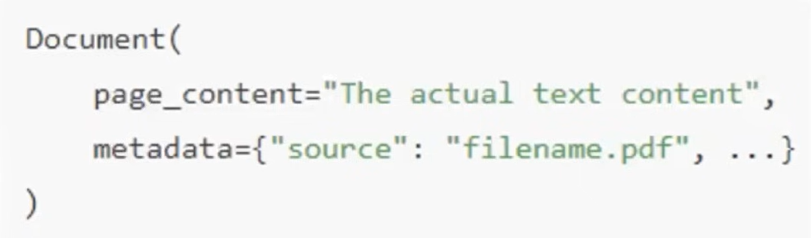

# 1. TextLoader

`TextLoader` is a simple and commonly used document loader in LangChain that reads plain text `(.txt)` files and converts them into LangChain Document objects

**Use Case**
- Ideal for loading chat logs, scraped text, transcripts, code snippets or any plain text data into a LangChain pipeline.

**Limitation**
- Works only with `.txt` files

## Code

In [3]:
from langchain_community.document_loaders import TextLoader

In [10]:
loader = TextLoader(file_path="chat_history.txt", encoding='utf-8')

In [13]:
docs = loader.load()

In [19]:
print(docs)

[Document(metadata={'source': 'chat_history.txt'}, page_content='Human: Hello Nature, how are you today?\nNature: I am calm and balanced today, with gentle winds and warm sunlight.\n\nHuman: Why do you change every day?\nNature: I change to keep life moving. Change brings growth, balance, and renewal.\n\nHuman: Why do we need trees?\nNature: Trees give you oxygen, shade, food, and shelter. They also keep the air and soil healthy.\n\nHuman: What happens when humans harm you?\nNature: When I am harmed, the air becomes polluted, the climate becomes unstable, and living beings suffer.\n\nHuman: How can humans protect you?\nNature: Humans can protect me by planting trees, saving water, reducing waste, and respecting all life.\n\nHuman: Do you forgive humans for their mistakes?\nNature: I always give chances, but balance must be restored for harmony to return.\n\nHuman: What is your message to humans?\nNature: Live simply, take only what you need, and care for the world as your home.\n')]


In [16]:
type(docs)

list

In [18]:
print(docs[0])

page_content='Human: Hello Nature, how are you today?
Nature: I am calm and balanced today, with gentle winds and warm sunlight.

Human: Why do you change every day?
Nature: I change to keep life moving. Change brings growth, balance, and renewal.

Human: Why do we need trees?
Nature: Trees give you oxygen, shade, food, and shelter. They also keep the air and soil healthy.

Human: What happens when humans harm you?
Nature: When I am harmed, the air becomes polluted, the climate becomes unstable, and living beings suffer.

Human: How can humans protect you?
Nature: Humans can protect me by planting trees, saving water, reducing waste, and respecting all life.

Human: Do you forgive humans for their mistakes?
Nature: I always give chances, but balance must be restored for harmony to return.

Human: What is your message to humans?
Nature: Live simply, take only what you need, and care for the world as your home.
' metadata={'source': 'chat_history.txt'}


In [20]:
docs[0].page_content

'Human: Hello Nature, how are you today?\nNature: I am calm and balanced today, with gentle winds and warm sunlight.\n\nHuman: Why do you change every day?\nNature: I change to keep life moving. Change brings growth, balance, and renewal.\n\nHuman: Why do we need trees?\nNature: Trees give you oxygen, shade, food, and shelter. They also keep the air and soil healthy.\n\nHuman: What happens when humans harm you?\nNature: When I am harmed, the air becomes polluted, the climate becomes unstable, and living beings suffer.\n\nHuman: How can humans protect you?\nNature: Humans can protect me by planting trees, saving water, reducing waste, and respecting all life.\n\nHuman: Do you forgive humans for their mistakes?\nNature: I always give chances, but balance must be restored for harmony to return.\n\nHuman: What is your message to humans?\nNature: Live simply, take only what you need, and care for the world as your home.\n'

In [21]:
docs[0].metadata

{'source': 'chat_history.txt'}

# PyPDFLoader

`PyPDFLoader` is a document loader in LangChain used to load content from PDF files and conver each page into a document object

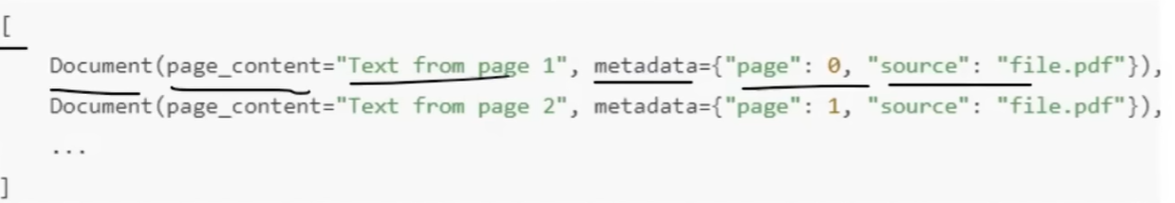

**Limitation**: It uses the `PyPDF` library under the hood - Not great with scanned PDFs or complex layouts.

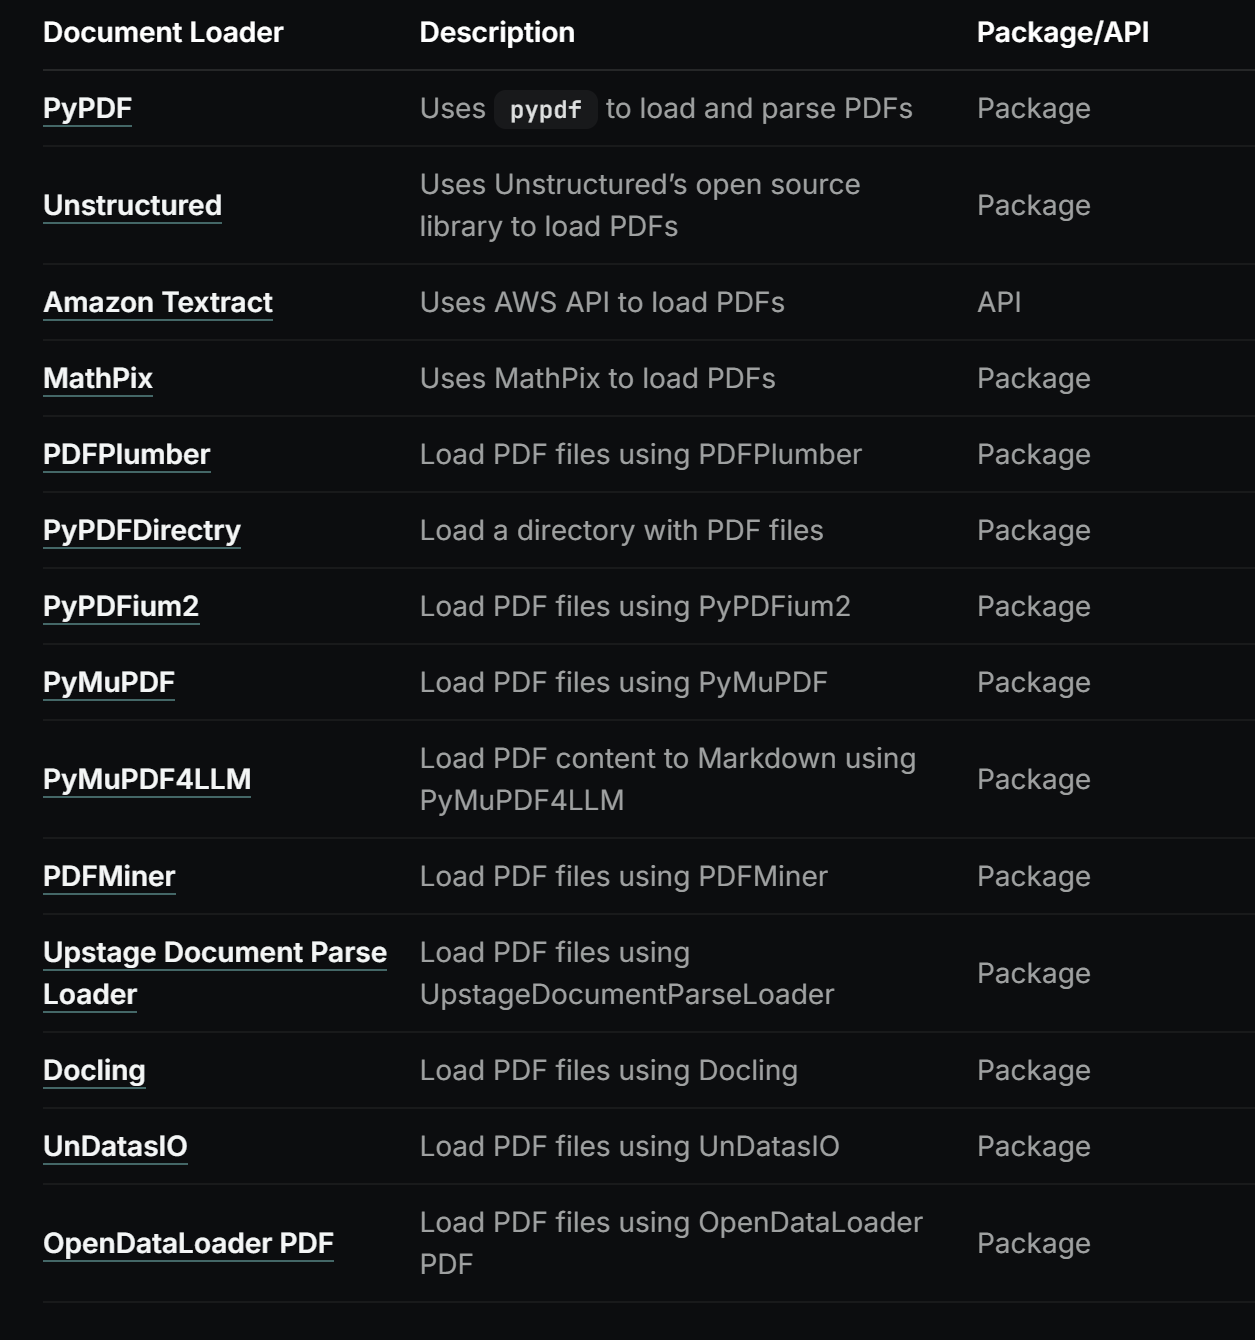

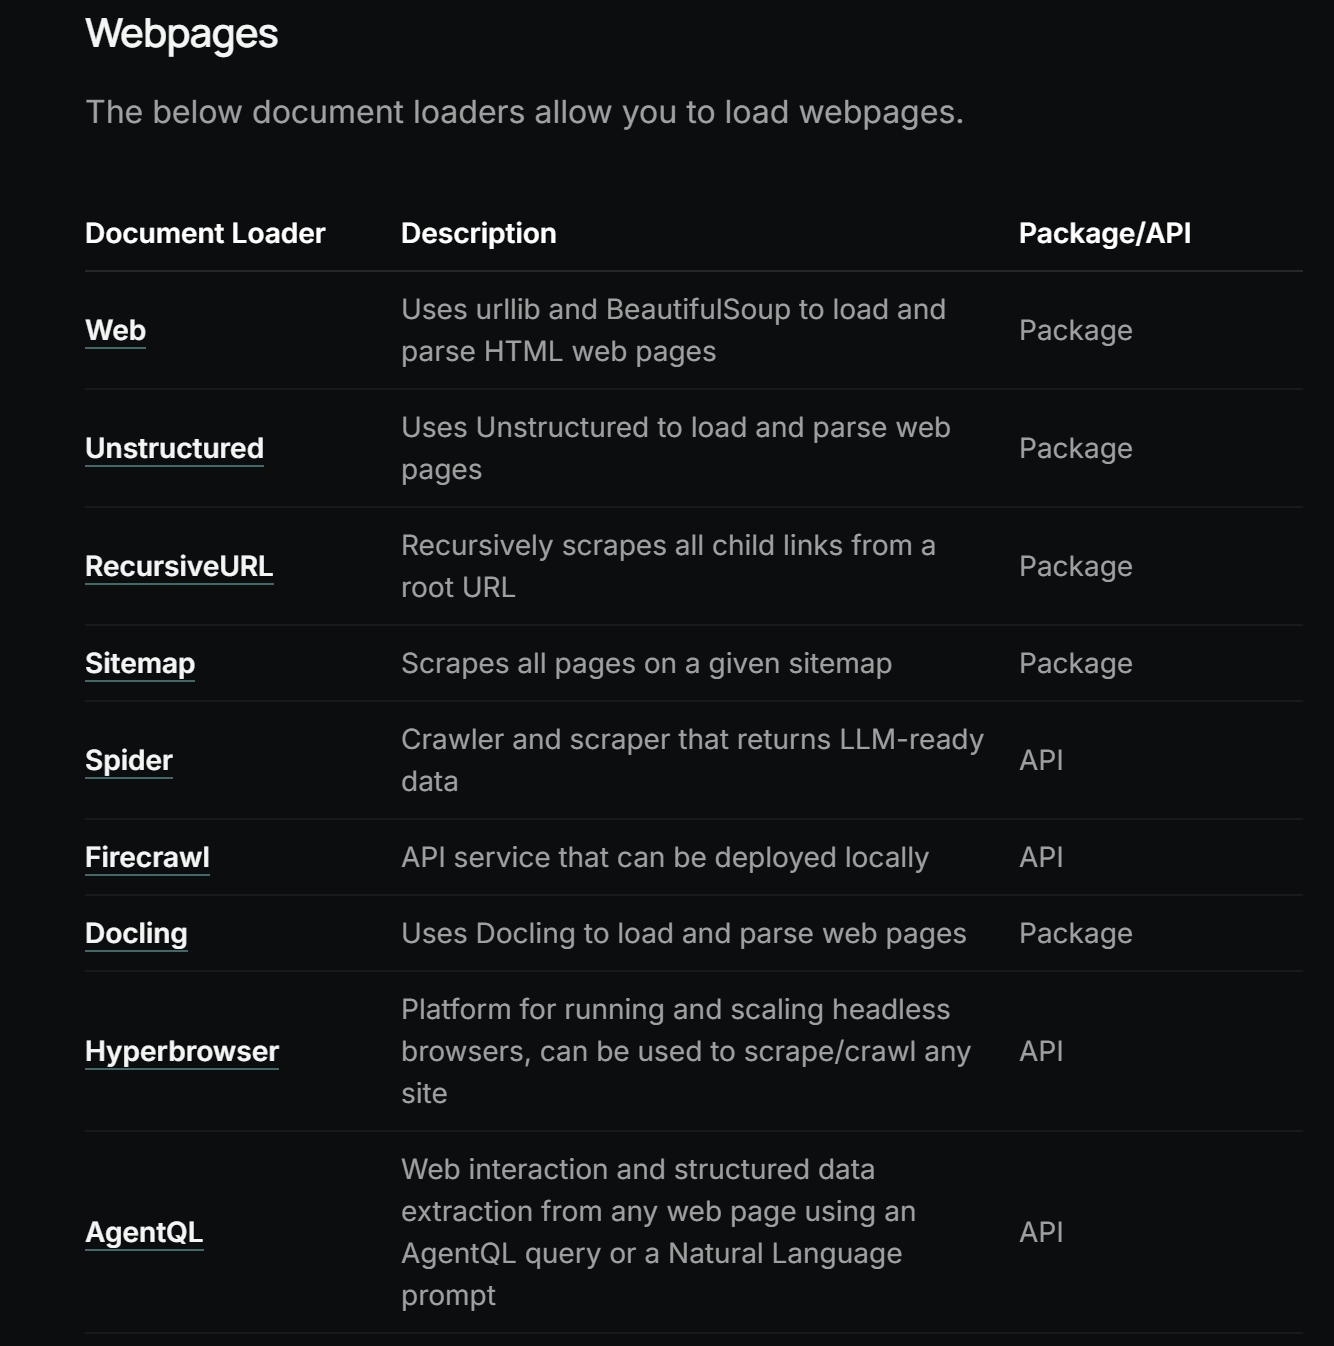

## Code

In [22]:
from langchain_community.document_loaders import PyPDFLoader

In [26]:
loader = PyPDFLoader("CS.pdf")

In [30]:
docs = loader.load()

In [32]:
print(len(docs))

27


In [34]:
print(docs[0].metadata)

{'producer': 'www.ilovepdf.com', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2019-07-11T11:02:10+00:00', 'source': 'CS.pdf', 'total_pages': 27, 'page': 0, 'page_label': '1'}


In [35]:
print(docs[0].page_content)

Syllabus of
UNDERGRADUATE DEGREE COURSE
B.Tech. V Semester
Computer Science and Engineering
Rajasthan Technical University, Kota
Effective from session: 2019 – 2020


In [38]:
docs

[Document(metadata={'producer': 'www.ilovepdf.com', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2019-07-11T11:02:10+00:00', 'source': 'CS.pdf', 'total_pages': 27, 'page': 0, 'page_label': '1'}, page_content='Syllabus of\nUNDERGRADUATE DEGREE COURSE\nB.Tech. V Semester\nComputer Science and Engineering\nRajasthan Technical University, Kota\nEffective from session: 2019 – 2020'),
 Document(metadata={'producer': 'www.ilovepdf.com', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2019-07-11T11:02:10+00:00', 'source': 'CS.pdf', 'total_pages': 27, 'page': 1, 'page_label': '2'}, page_content='RAJASTHAN TECHNICAL UNIVERSITY, KOTA\nSyllabus\nIII Year-V Semester: B.Tech. Computer Science and Engineering\nSyllabus of 3rdYear B. Tech. (CS) for students admitted in Session 2017-18 onwards. Page 2\n5CS3-01: Information Theory & Coding\nCredit: 2 Max. Marks: 100(IA:20, ETE:80)\n2L+0T+0P End Term Exam: 2 Hours\nSN Contents Hours\n1 Introduction:Objective, scope and outcome of the course. 0

# DirectoryLoader

- It is a document loader that lets you load multiple documents from a directory (folder) of files.

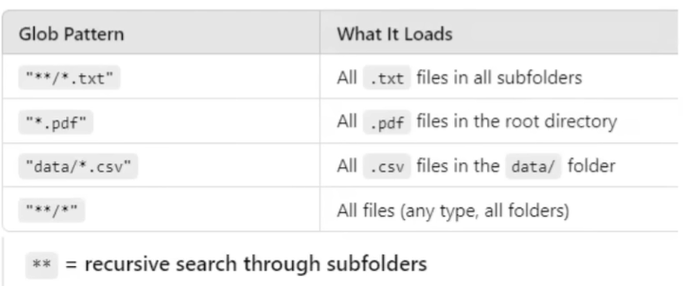

### Code

In [4]:
from langchain_community.document_loaders import DirectoryLoader, PyPDFLoader

In [7]:
loader = DirectoryLoader(
    path="temp_dir/",
    glob="*.pdf",
    loader_cls=PyPDFLoader
)

In [8]:
docs = loader.load()

In [10]:
len(docs)

54

In [13]:
docs[0]

Document(metadata={'producer': 'www.ilovepdf.com', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2019-07-11T11:02:10+00:00', 'source': 'temp_dir\\CS - Copy.pdf', 'total_pages': 27, 'page': 0, 'page_label': '1'}, page_content='Syllabus of\nUNDERGRADUATE DEGREE COURSE\nB.Tech. V Semester\nComputer Science and Engineering\nRajasthan Technical University, Kota\nEffective from session: 2019 – 2020')

In [17]:
docs[50].metadata

{'producer': 'www.ilovepdf.com',
 'creator': 'PyPDF',
 'creationdate': '',
 'moddate': '2019-07-11T11:02:10+00:00',
 'source': 'temp_dir\\CS.pdf',
 'total_pages': 27,
 'page': 23,
 'page_label': '24'}

In [18]:
docs[50].page_content

'RAJASTHAN TECHNICAL UNIVERSITY, KOTA\nSyllabus\nIII Year-VI Semester: B.Tech. Computer Science and Engineering\nSyllabus of 3rdYear B. Tech. (CS) for students admitted in Session 2017-18 onwards. Page 11\n6CS4-21: Digital Image Processing Lab\nCredit: 1.5 Max. Marks: 75(IA:45, ETE:30)\n0L+0T+3P End Term Exam: 2 Hours\nSN List of Experiments\n1\nPoint-to-point transformation. This laboratory experiment provides for\nthresholding an image and the evaluation of its histogram. Histogram\nequalization. This experiment illustrates the relationship among the\nintensities (gray levels) of an image and its histogram.\n2 Geometric transformations. This experiment shows image rotation, scal ing,\nand translation. Two-dimensional Fourier transform\n3 Linear filtering using convolution. Highly selective filters.\n4\nIdeal filters in the frequency domain. Non Linear filtering using convolutional\nmasks. Edge detection. This experiment enables stu dents to understand the\nconcept of edge detectors a

# Load *vs* Lazy Load

In [19]:
from langchain_community.document_loaders import DirectoryLoader, PyPDFLoader

In [20]:
loader = DirectoryLoader(
    path="temp_dir/",
    glob="*.pdf",
    loader_cls=PyPDFLoader
)

#### using load

In [27]:
%%time
docs = loader.load()

CPU times: total: 1min 27s
Wall time: 1min 30s


In [28]:
%%time

for doc in docs:
    print(len(docs))


54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
CPU times: total: 0 ns
Wall time: 2.02 ms


#### using lazy load

In [34]:
%%time
docs = loader.lazy_load()

CPU times: total: 0 ns
Wall time: 0 ns


In [37]:
%%time

for doc in docs:
    print(doc.metadata)

{'producer': 'www.ilovepdf.com', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2019-07-11T11:02:10+00:00', 'source': 'temp_dir\\CS - Copy.pdf', 'total_pages': 27, 'page': 2, 'page_label': '3'}
{'producer': 'www.ilovepdf.com', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2019-07-11T11:02:10+00:00', 'source': 'temp_dir\\CS - Copy.pdf', 'total_pages': 27, 'page': 3, 'page_label': '4'}
{'producer': 'www.ilovepdf.com', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2019-07-11T11:02:10+00:00', 'source': 'temp_dir\\CS - Copy.pdf', 'total_pages': 27, 'page': 4, 'page_label': '5'}
{'producer': 'www.ilovepdf.com', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2019-07-11T11:02:10+00:00', 'source': 'temp_dir\\CS - Copy.pdf', 'total_pages': 27, 'page': 5, 'page_label': '6'}
{'producer': 'www.ilovepdf.com', 'creator': 'PyPDF', 'creationdate': '', 'moddate': '2019-07-11T11:02:10+00:00', 'source': 'temp_dir\\CS - Copy.pdf', 'total_pages': 27, 'page': 6, 'page_label': '7'}
{'pro

# WebBaseLoader

WebBaseLoader is a document loader in LangChain used to load and extract text content from web pages (URLs)

- It uses Requests and BeautifulSoup under the hood to parse HTML and extract visible text

**When to Use**:
- - For Blogs, news, articles, or public websites where the content is primarily text-based and static

**Limitations**:
- - Doesn't handle JavaScript-heavy pages well (use `SeleniumURLLoader` for that)
  - Loads only static content (what's in the HTML,, not what loads after the page renders)

### Code

In [2]:
from langchain_community.document_loaders import WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
url = "https://www.amazon.in/Hero-Premium-Shooting-Booking-Ex-Showroom/dp/B0F7XLKX8Y/?_encoding=UTF8&pd_rd_w=8ebjq&content-id=amzn1.sym.13fe170f-2614-440c-9b26-6ec5a6de037f&pf_rd_p=13fe170f-2614-440c-9b26-6ec5a6de037f&pf_rd_r=T1MBRC8196SGS6V940M6&pd_rd_wg=FDG1Z&pd_rd_r=d7dcd576-c630-4162-af61-5b9874df19db&ref_=pd_hp_d_btf_ls_gwc_pc_en4_&th=1"

In [4]:
loader = WebBaseLoader(
    web_path = url  # can also pass list of url
)

In [5]:
docs = loader.load()

In [6]:
print(docs[0])

page_content='









































































































Hero Xtreme 160R 4V Fi (DSCS) Bike Premium Neon Shooting Star Booking For Ex-Showroom Price : Amazon.in: Sports, Fitness & Outdoors













































Skip to



        Main content
      



        About this item
      



        About this item
      



        About this item
      



        Buying options
      



        Compare with similar items
      



        Videos
      



        Reviews
      




      Keyboard shortcuts
  




Search

alt
+
/







Cart

shift
+
alt
+
C







Home

shift
+
alt
+
H







Orders

shift
+
alt
+
O







Add to cart

shift
+
alt
+
K







Show/Hide shortcuts

shift
+
alt
+
Z










To move between items, use your keyboard's up or down arrows.
















.in









                   Delivering to Jaipur 302001
                

                   Update location
           

# CSVLoader

- It is a document loader used to load CSV files into LangChain Document Objects- one per row, by Default

In [7]:
from langchain_community.document_loaders import CSVLoader

In [8]:
loader = CSVLoader(file_path="customers.csv")

In [9]:
docs = loader.load()

In [12]:
len(docs)

100

In [17]:
print(docs[0].page_content)

Index: 1
Customer Id: DD37Cf93aecA6Dc
First Name: Sheryl
Last Name: Baxter
Company: Rasmussen Group
City: East Leonard
Country: Chile
Phone 1: 229.077.5154
Phone 2: 397.884.0519x718
Email: zunigavanessa@smith.info
Subscription Date: 2020-08-24
Website: http://www.stephenson.com/


In [18]:
print(docs[0].metadata)

{'source': 'customers.csv', 'row': 0}


In [19]:
print(docs[0])

page_content='Index: 1
Customer Id: DD37Cf93aecA6Dc
First Name: Sheryl
Last Name: Baxter
Company: Rasmussen Group
City: East Leonard
Country: Chile
Phone 1: 229.077.5154
Phone 2: 397.884.0519x718
Email: zunigavanessa@smith.info
Subscription Date: 2020-08-24
Website: http://www.stephenson.com/' metadata={'source': 'customers.csv', 'row': 0}
